In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# Rainfall analysis - How to test a feeling

I was whatsapping with a friend of mine the other day, and when it comes with people you don't listen for a while, we made a comment about the weather. Mine was "is going to be a dry year, there has been so few rainy day that I am expecting a drought this year". They immediately replaied with "Puglia, Italy, has always had a higher quantity of rainfall with respect to London" before commenting about the weather in the region where they are currently living. And yes, I really enjoy and value having nerds friends.

Later that day, I started researching about rainfall data in London, South of England, Puglia and South of Italy to verify if my feeling was true or just a feeling, and I stumbled to the core question: "how can I demontrate a feeling?" No surprise, I had to shift to a more mundane "how I test a feeling?". In the next section of this notebook, I will discuss some findings about my research.

In [2]:
data = pd.read_csv('./data/south_east_rainfall.csv',
                   sep=',')

data.columns = data.columns.str.strip()
string_columns = data.select_dtypes(include=['object']).columns
data[string_columns] = data[string_columns].apply(pd.to_numeric, errors='coerce')
data_melt = data[['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']].melt(id_vars='year',var_name='month', value_name='value').sort_values(by='year')
data_melt['month'] = pd.Categorical(data_melt['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
data_melt.rename(columns={'value': 'rainfall'}, inplace=True)

In [3]:
data_melt.head()

,year,month,rainfall
0,1836,jan,63.0
570,1836,apr,69.7
380,1836,mar,103.6
1330,1836,aug,43.3
1900,1836,nov,121.3


In [4]:
rainfall_south_east = data_melt[data_melt['year'] >= 2010].copy().reset_index(drop=True)
rainfall_south_east.shape

(192, 3)

In [5]:
rainfall_south_east.head()

,year,month,rainfall
0,2010,nov,71.3
1,2010,aug,109.7
2,2010,jul,42.0
3,2010,apr,23.9
4,2010,may,32.3


In [6]:
(rainfall_south_east[rainfall_south_east['year'] < 2024]
 .groupby('month', observed=True)['rainfall']
 .mean()
 .sort_values()
 .head(5)
 )


month
apr    42.035714
may    53.292857
jul    57.192857
mar    57.607143
sep    57.835714
Name: rainfall, dtype: float64

In [7]:
data_melt

,year,month,rainfall
0,1836,jan,63.0
570,1836,apr,69.7
380,1836,mar,103.6
1330,1836,aug,43.3
1900,1836,nov,121.3
...,...,...,...
569,2025,mar,8.8
379,2025,feb,56.8
189,2025,jan,98.2
2089,2025,nov,NaN


In [19]:
yearly_aggregate = (data_melt
                    .groupby(['year'])
                    .agg(
                        total_rainfall = ('rainfall', 'sum'),
                        avg_rainfall=('rainfall', 'mean'),
                        median_rainfall=('rainfall', 'median'),
                        std_rainfall=('rainfall', 'std'),
                        min_rainfall=('rainfall', 'min'),
                        max_rainfall=('rainfall', 'max')
                        )
                        ).reset_index()
yearly_aggregate.head()

,year,total_rainfall,avg_rainfall,median_rainfall,std_rainfall,min_rainfall,max_rainfall
0,1836,823.5,68.625000,61.80,29.269380,16.1,121.3
1,1837,683.2,56.933333,56.80,20.707106,23.3,93.1
2,1838,703.1,58.591667,53.85,26.424591,19.6,119.1
3,1839,887.2,73.933333,72.45,30.584320,27.5,116.3
4,1840,610.5,50.875000,49.90,31.935478,7.9,119.7


In [20]:
yearly_aggregate

,year,total_rainfall,avg_rainfall,median_rainfall,std_rainfall,min_rainfall,max_rainfall
0,1836,823.5,68.625000,61.80,29.269380,16.1,121.3
1,1837,683.2,56.933333,56.80,20.707106,23.3,93.1
2,1838,703.1,58.591667,53.85,26.424591,19.6,119.1
3,1839,887.2,73.933333,72.45,30.584320,27.5,116.3
4,1840,610.5,50.875000,49.90,31.935478,7.9,119.7
...,...,...,...,...,...,...,...
185,2021,806.3,67.191667,62.10,35.869649,10.3,122.3
186,2022,709.9,59.158333,45.90,39.801952,10.7,151.5
187,2023,993.0,82.750000,78.10,41.641446,9.3,146.9
188,2024,976.4,81.366667,77.85,35.730362,24.8,144.4


test
test


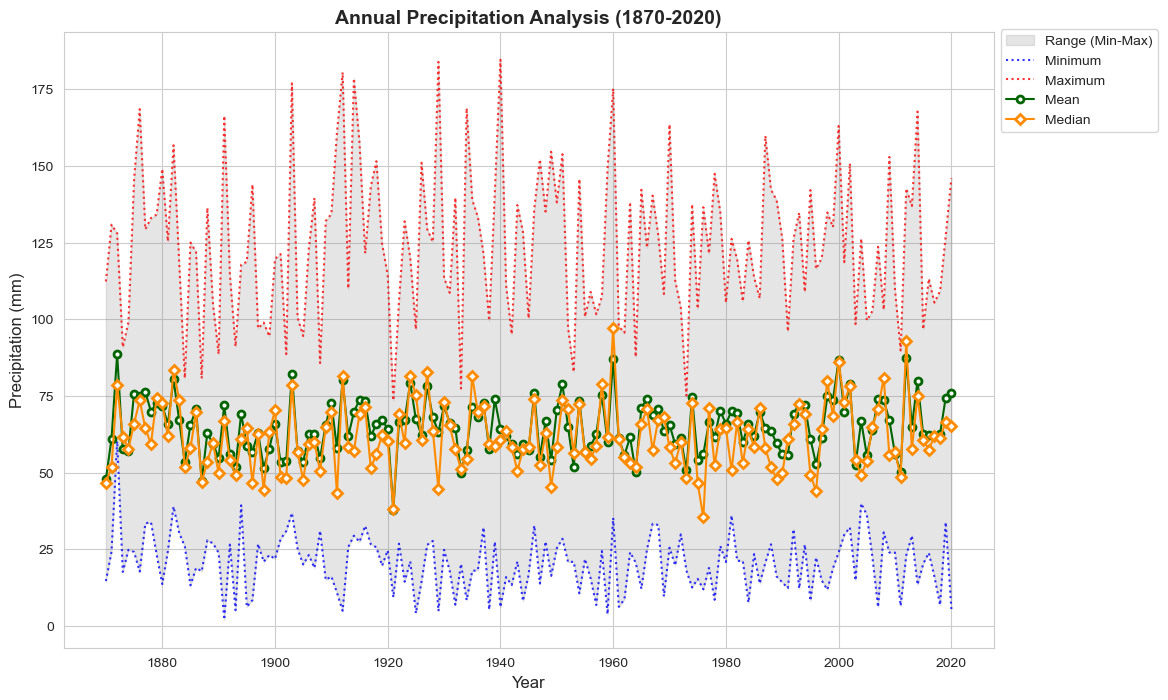

<Figure size 1400x700 with 0 Axes>

In [22]:
from src.data_plotting import plot_min_max_rainfall
# Plot full range
fig1, ax1 = plot_min_max_rainfall(yearly_aggregate,start_year=1870, end_year=2020, figsize=(12,8))
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

# Plot vertical bars (lines) connecting min and max
for idx, row in yearly_aggregate.iterrows():
    ax.plot([row['year'], row['year']], [row['min_value'], row['max_value']], color='steelblue', linewidth=2);
    ax.scatter([row['year']], [row['min_value']], color='blue', s = 20, label='Min' if idx == 0 else "");
    ax.scatter([row['year']], [row['max_value']], color='orange', s = 20, label='Max' if idx == 0 else "");

# Labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.set_title('Min and Max Rainfall per Year')
ax.legend()

start_year = yearly_aggregate['year'].min()
end_year = yearly_aggregate['year'].max()

# Generate ticks: start at 1836, go every 5 years, include last year if needed
# xticks = list(np.arange(start_year, end_year + 1, 5));
xticks = [1836] + list(np.arange(1840, 2030, 5));
if end_year not in xticks:
    xticks.append(end_year);

plt.xticks(xticks, rotation=60);

# plt.xticks(yearly_aggregate['year'], rotation = 60);  # Ensure all years are shown on x-axis

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

yearly_aggregate_2010 = yearly_aggregate[yearly_aggregate['year'] > 2010]
# Plot vertical bars (lines) connecting min and max
for idx, row in yearly_aggregate_2010.iterrows():
    ax.plot([row['year'], row['year']], [row['min_value'], row['max_value']], color='steelblue', linewidth=10);
    #ax.scatter([row['year']], [row['min_value']], color='blue', s = 300, label='Min' if idx == 0 else "");
    #ax.scatter([row['year']], [row['max_value']], color='orange', s = 300, label='Max' if idx == 0 else "");

# Labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Rainfall')
ax.set_title('Min and Max Rainfall per Year')
ax.legend()

start_year = yearly_aggregate_2010['year'].min()
end_year = yearly_aggregate_2010['year'].max()

# Generate ticks: start at 1836, go every 5 years, include last year if needed
xticks = list(np.arange(start_year, end_year + 1));
xticks = [yearly_aggregate_2010['year'].min()] + list(np.arange(yearly_aggregate_2010['year'].min(),yearly_aggregate_2010['year'].max()));
if end_year not in xticks:
    xticks.append(end_year);

plt.xticks(xticks, rotation=60);

# plt.xticks(yearly_aggregate['year'], rotation = 60);  # Ensure all years are shown on x-axis

In [11]:
yearly_aggregate_2010.head()

NameError: name 'yearly_aggregate_2010' is not defined

In [10]:
rainfall_per_year = (data_melt
                     .groupby('year')
                     .agg(mean_value=('value', 'mean'),
                          median_value=('value', 'median'),
                          std_value=('value', 'std'),
                          min_value=('value', 'min'),
                          max_value=('value', 'max')
                          )
                          ).reset_index()
rainfall_per_year

KeyError: "Column(s) ['value'] do not exist"

### Dataset

### MuZiK